<a href="https://colab.research.google.com/github/ChantelMagaia/LearningFromData/blob/main/216001407_CC_Magaia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chantel Magaia**
- **216001407**
- **ISM8X09**
- **PREDICTIVE ANALYTICS**
- **Assignment 3**


---


## **Tesla Stock Price Prediction**

**About Data**

* **Tesla, Inc.** is an American electric vehicle (EV) and clean energy company founded by Elon Musk, Martin Eberhard, and Marc Tarpenning. It is named after the inventor Nikola Tesla. Tesla is headquartered in Palo Alto, California, and is known for its innovative approach to electric vehicles and sustainable energy solutions.*

* [**Tesla Stock Price Prediction**](https://data.mendeley.com/datasets/c7r6ky4xgc/1)

* **Training date** from 01/09/2019 to 15/03/2022 and **Test file** from 16/03/2020 to 30/12/2022

**Import necessary libraries**

In [6]:
# !pip install pmdarima

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

# filter warnings
import warnings
warnings.filterwarnings('ignore')

# time series model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# metrics
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparamenter tuning
from itertools import product

# Plot Theme
plt.style.use("seaborn-deep")

# Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

# **1. Data Preparation**

**Load the dataset**

In [8]:
tesla = pd.read_csv("Training.csv")

**Display Shape**

In [9]:
tesla.shape

(958, 16)

In [10]:
tesla.head(5)

,date,open,close,volume,count_of_Public_netural,count_of_Public_positve,count_of_Public_negative,count_of_financial_negative,count_of_financial_netural,count_of_financial_positve,Negative_Tweets,Neutral_Tweets,Positive_Tweets,public_news_threshold,financial_news_threshold,tweets_threshold
0,01/02/2019,20.406668,20.674667,0.191317,0.384615,0.285714,0.125,0.75,0.4,0.000000,0.045161,0.032764,0.046192,1,1,-1
1,01/03/2019,20.466667,20.024000,0.114298,0.076923,0.285714,0.000,0.00,0.3,0.000000,0.048848,0.028150,0.047857,1,1,-1
2,01/04/2019,20.400000,21.179333,0.121336,0.307692,0.142857,0.000,0.00,0.1,0.363636,0.037788,0.022612,0.039118,1,1,-1
3,01/07/2019,21.448000,22.330668,0.123914,0.000000,0.142857,0.125,0.00,0.1,0.000000,0.028571,0.022150,0.040366,-1,-1,-1
4,01/08/2019,22.797333,22.356667,0.115009,0.076923,0.142857,0.000,0.00,0.1,0.000000,0.029493,0.022150,0.039534,-1,-1,-1


In [11]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         807 non-null    object 
 1   open                         807 non-null    float64
 2   close                        807 non-null    float64
 3   volume                       807 non-null    float64
 4   count_of_Public_netural      958 non-null    float64
 5   count_of_Public_positve      958 non-null    float64
 6   count_of_Public_negative     958 non-null    float64
 7   count_of_financial_negative  958 non-null    float64
 8   count_of_financial_netural   958 non-null    float64
 9   count_of_financial_positve   958 non-null    float64
 10  Negative_Tweets              958 non-null    float64
 11  Neutral_Tweets               958 non-null    float64
 12  Positive_Tweets              958 non-null    float64
 13  public_news_threshol

**Drop nulls**

In [12]:
columns_to_keep = ['date', 'open', 'close', 'volume']

# Drop all columns except the specified ones
tesla = tesla[columns_to_keep]

In [13]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    807 non-null    object 
 1   open    807 non-null    float64
 2   close   807 non-null    float64
 3   volume  807 non-null    float64
dtypes: float64(3), object(1)
memory usage: 30.1+ KB


**Correlation Metrix**

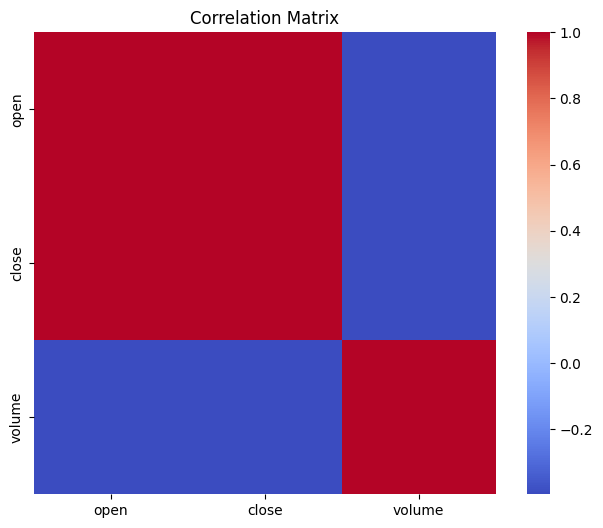

In [14]:
correlation_matrix = tesla.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Matrix")
plt.show()

In [15]:
tesla['date'] = pd.to_datetime(tesla['date'])  # Adjust the format to match your data

# Filter data from the beginning up to January 2022
start_date = pd.to_datetime('2022-01-01', format='%Y-%m-%d')

# Now, you can filter the DataFrame based on datetime values
tesla = tesla[tesla['date'] <= start_date]

# Sort the DataFrame by the "date" column to ensure chronological order
tesla.sort_values(by='date', inplace=True)

In [16]:
tesla['date'] = pd.to_datetime(tesla['date'])
tesla.set_index('date', inplace=True)

tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-01-02 to 2021-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    757 non-null    float64
 1   close   757 non-null    float64
 2   volume  757 non-null    float64
dtypes: float64(3)
memory usage: 23.7 KB


# **2. Exploratory Data Analysis**

**Explore the Data**

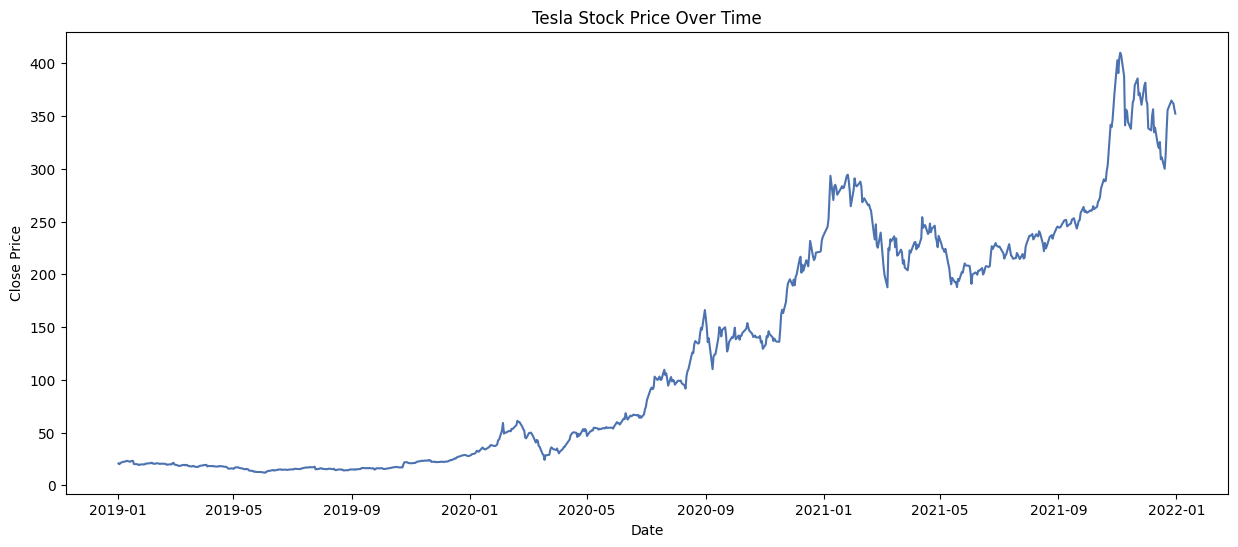

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(tesla['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price Over Time')
plt.show()

**Descriptive Statistics**

In [18]:
print(tesla.describe())

             open       close      volume
count  757.000000  757.000000  757.000000
mean   124.801651  124.929014    0.162564
std    110.195660  110.289587    0.112000
min     12.073333   11.931333    0.032165
25%     20.773333   20.813999    0.086347
50%     81.431999   80.577332    0.126443
75%    223.880005  223.333328    0.206775
max    411.470001  409.970001    1.000000


# **3. Test for seasonality and if the data is stationary**

### **Check Stationarity**

To check for stationarity using rolling statistics and the Dickey-Fuller test

In [19]:
time_series = tesla['close']

rolling_mean = time_series.rolling(window=12).mean()
rolling_std = time_series.rolling(window=12).std()

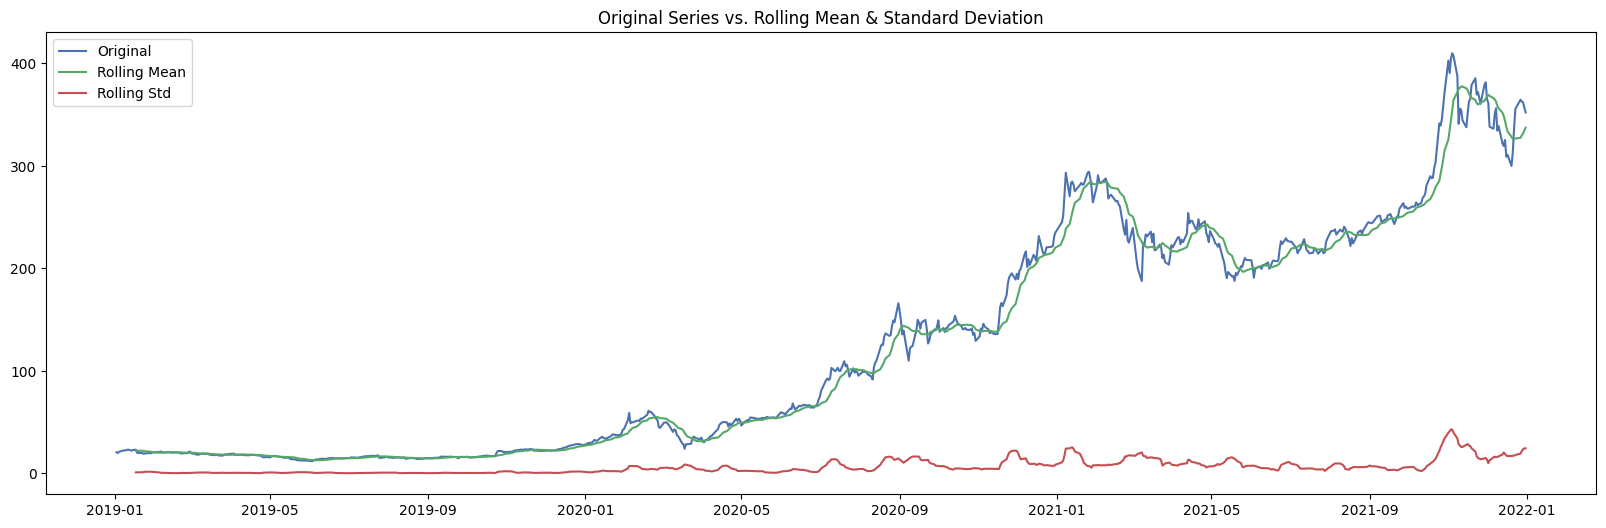

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(time_series, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Original Series vs. Rolling Mean & Standard Deviation')
plt.show()

### **Perform Dickey-Fuller Test**

We use the Dickey-Fuller test to check for stationarity. The null hypothesis of the test is that the time series has a unit root (it's non-stationary)

In [21]:
def perform_adf_test(time_series):
    result = adfuller(time_series)
    print('ADF Statistic:', result[0])
    print()
    print('p-value:', result[1])
    print()
    print('Critical Values:', result[4])

perform_adf_test(time_series)

ADF Statistic: 0.303217135951836

p-value: 0.9774916061308752

Critical Values: {'1%': -3.439029421541435, '5%': -2.8653706489231876, '10%': -2.568809835460933}


**Plot Autocorrelation and Partial Autocorrelation**

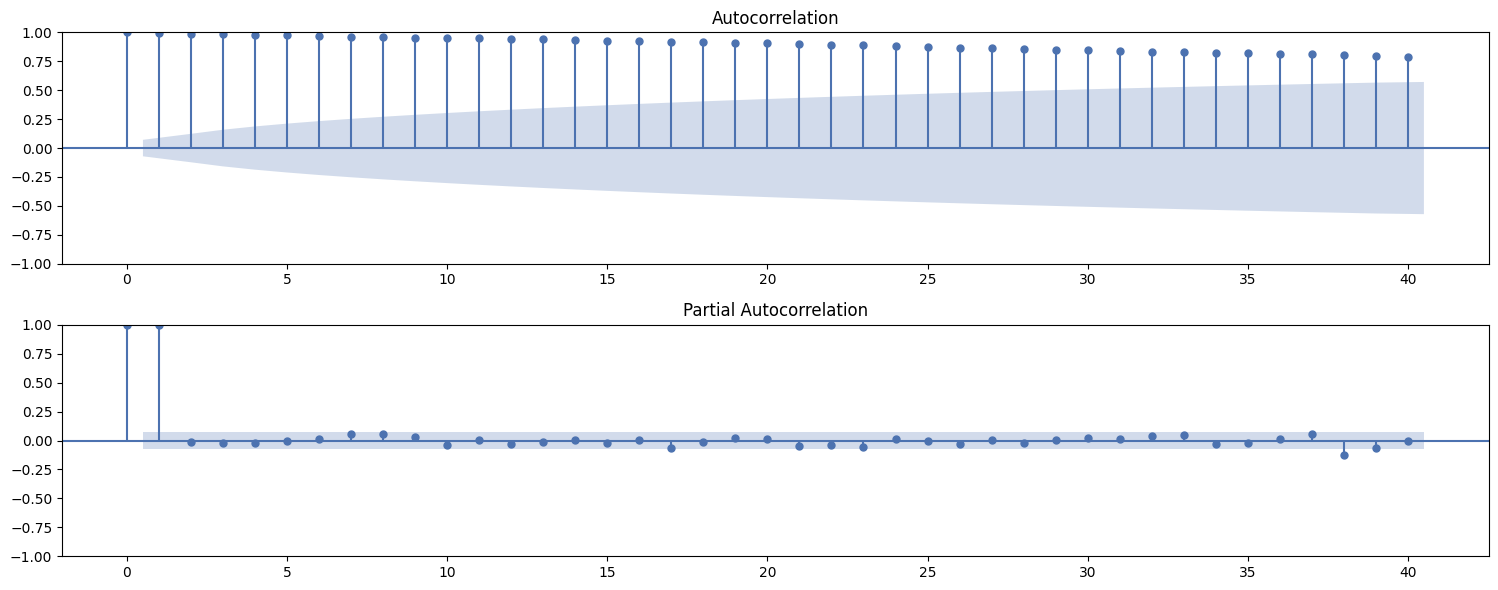

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(211)
plot_acf(tesla['close'], lags=40, ax=plt.gca(), title='Autocorrelation')

plt.subplot(212)
plot_pacf(tesla['close'], lags=40, ax=plt.gca(), title='Partial Autocorrelation')

plt.tight_layout()
plt.show()

### **Train-Test Split**

In [23]:
# Split the data into training and testing sets

train_size = int(len(tesla) * 0.8)
train_data = tesla.iloc[:train_size]
test_data = tesla.iloc[train_size:]

# Print the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
# print(test_data)

Training data shape: (605, 3)
Testing data shape: (152, 3)


# **4. Time Series Model**

### **4.1. Seasonal Autoregressive Integrated Moving Average (SARIMA)**

In [24]:
# Define ranges for orders and seasonal orders
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
P_range = range(0, 3)
D_range = range(0, 2)
Q_range = range(0, 3)

# Generate all possible combinations
param_combinations = list(product(p_range, d_range, q_range, P_range, D_range, Q_range, [12]))  # Seasonality of 12 for monthly data

best_rmse = float('inf')
best_params = None
best_forecast = None

for params in param_combinations:
    p, d, q, P, D, Q, s = params
    try:
        model = sm.tsa.SARIMAX(train_data['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
        fit_model = model.fit()
        forecast = fit_model.get_forecast(steps=len(test_data), dynamic=True)
        rmse = mean_squared_error(test_data['close'], forecast.predicted_mean, squared=False)

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = params
            best_forecast = forecast
    except:
        continue

print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 64.03331911116551
Best Parameters: (2, 1, 2, 0, 1, 2, 12)


**Make Predictions**

In [25]:
sarima_forecast_close = best_forecast.predicted_mean

**Visualize Results**

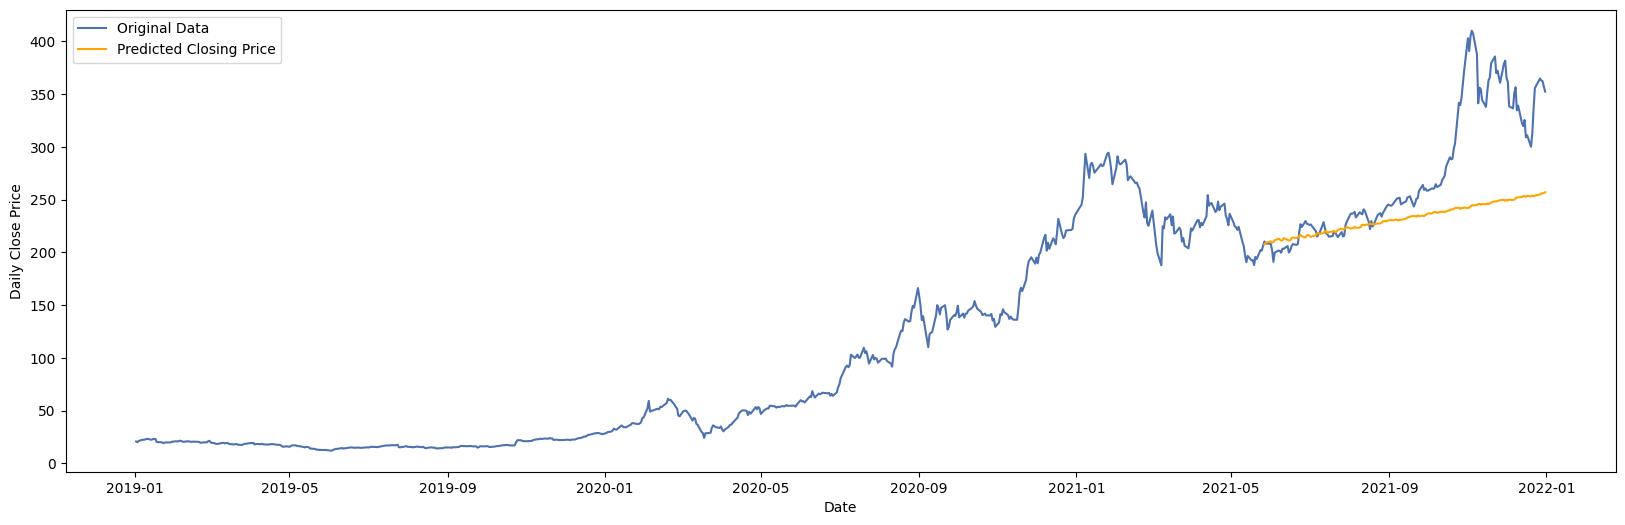

In [26]:
plt.figure(figsize=(20, 6))
plt.plot(tesla['close'], label='Original Data')
plt.plot(test_data.index, sarima_forecast_close, label='Predicted Closing Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Close Price')
plt.legend()
plt.show()

**Model Evaluation**

In [27]:
# Calculate evaluation metrics
mse = mean_squared_error(test_data['close'], sarima_forecast_close)
rmse = np.sqrt(mse)
r2 = r2_score(test_data['close'], sarima_forecast_close)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Root Mean Squared Error (RMSE): 64.03331911116551
R-squared (R2): -0.09845495049349862
